# First steps tutorial

In this tutorial we are going to show how to: 

- Extract features from your times series orthomosaics.

- Calculate basic RGB vegetation indexes.

- Plot them in a times series manner and display the times series images.

- Finally we are going to use those Vegetation index to predict with a simple approach when they reached maturity.

## Imports

In [ ]:
import Pynomic

## Data extraction

Here we define our folder path where we have our orthomosaics ready, that includes: 
- All of them are aligned (co-registration).

- Their names starts with the dates that they have been flown eg: YYYYMMDD_location.tif.

Define the grid to use. This grid can have additional information from each plot and must have a unique id for each plot. the funciton process_stack_tiff is going to require it. 

Finally we write the names of the bands to identify them in the order that they have been stacked.

In [ ]:
path_folder_with_orthomosaics ='/your/path/to/folder/flights'
path_to_grid = '/your/path/to/grid.shp'

In [22]:
soybean_maturity_trials = Pynomic.process_stack_tiff(folder_path= path_folder_with_orthomosaics,
                                                     grid_path= path_to_grid,
                                                     col_id= 'fid',
                                                     bands_n=['red','green','blue']                                             
                                                    )

1/7 : 20180917_Lamberton_clipped.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
2/7 : 20180815_Lamberton_clipped.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
3/7 : 20180905_Lamberton_clipped.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
4/7 : 20180829_Lamberton_clipped.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
5/7 : 20180914_Lamberton_clipped.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
6/7 : 20180925_Lamberton_clipped.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
7/7 : 20180822_Lamberton_clipped.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615


## Data accesion

Once the porcces has finished we can acces to all the data needed. For example .ldata is going to return us a geopandasdataframe in long format. Contains all the information in the grid and the mean of each band. aswell an *id* column is added as unique identifier of that plot for each date. This column is going to allow us to select the time series of that plot.

In [23]:
soybean_maturity_trials.ldata

,id,fid,date,red,green,blue,ID,geometry
0,A1,1,20180917,196.813842,147.758235,89.487787,1,"POLYGON ((315803.555 4900902.953, 315803.647 4..."
1,A2,2,20180917,195.660992,144.670984,81.919041,2,"POLYGON ((315803.647 4900904.542, 315803.738 4..."
2,A3,3,20180917,193.712169,142.281756,83.328056,3,"POLYGON ((315803.738 4900906.132, 315803.829 4..."
3,A4,4,20180917,190.801443,144.724556,92.567450,4,"POLYGON ((315803.829 4900907.721, 315803.921 4..."
4,A5,5,20180917,190.149981,142.098723,88.865285,5,"POLYGON ((315803.921 4900909.31, 315804.012 49..."
...,...,...,...,...,...,...,...,...
275,A36,36,20180822,180.385965,160.341837,66.221357,36,"POLYGON ((315766.706 4900905.024, 315766.797 4..."
276,A37,37,20180822,136.729144,132.977354,65.556033,37,"POLYGON ((315766.797 4900906.614, 315766.888 4..."
277,A38,38,20180822,172.049946,149.099982,72.017723,38,"POLYGON ((315766.888 4900908.203, 315766.98 49..."
278,A39,39,20180822,168.456856,148.907537,77.885965,39,"POLYGON ((315766.98 4900909.792, 315767.071 49..."


other relevant information can be diplayed such as:

In [24]:
## Dates
soybean_maturity_trials.dates

['20180917',
 '20180815',
 '20180905',
 '20180829',
 '20180914',
 '20180925',
 '20180822']

In [25]:
## Bands
soybean_maturity_trials.bands_name

['red', 'green', 'blue']

## Vegetation index calculation

Here we indicate the name of each band and automatically calculates the vegetation index with the mean of each band obtain initially.

In [26]:
soybean_maturity_trials.RGB_VI(Red='red',
                               Green='green',
                               Blue='blue')

In [27]:
soybean_maturity_trials.ldata

,id,fid,date,red,green,blue,ID,geometry,VDVI,NGRDI,VARI,GRRI,VEG,MGRVI,GLI,ExR,ExB,ExG
0,A1,1,20180917,196.813842,147.758235,89.487787,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.015838,-0.142367,-0.192311,0.750751,0.976066,-0.566450,-0.032186,0.294386,-0.051779,9.214841
1,A2,2,20180917,195.660992,144.670984,81.919041,2,"POLYGON ((315803.647 4900904.542, 315803.738 4...",0.020747,-0.149824,-0.197320,0.739396,0.988077,-0.627832,-0.042373,0.306108,-0.071011,11.761936
2,A3,3,20180917,193.712169,142.281756,83.328056,3,"POLYGON ((315803.738 4900906.132, 315803.829 4...",0.013396,-0.153069,-0.203551,0.734501,0.972729,-0.635594,-0.027156,0.307437,-0.061105,7.523288
3,A4,4,20180917,190.801443,144.724556,92.567450,4,"POLYGON ((315803.829 4900907.721, 315803.921 4...",0.010615,-0.137327,-0.189649,0.758509,0.965081,-0.523820,-0.021457,0.285913,-0.035343,6.080218
4,A5,5,20180917,190.149981,142.098723,88.865285,5,"POLYGON ((315803.921 4900909.31, 315804.012 49...",0.009201,-0.144624,-0.197430,0.747298,0.962731,-0.568369,-0.018573,0.294721,-0.042001,5.182180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,A36,36,20180822,180.385965,160.341837,66.221357,36,"POLYGON ((315766.706 4900905.024, 315766.797 4...",0.130579,-0.058827,-0.073019,0.888882,1.240987,-0.226936,-0.300382,0.226560,-0.166193,74.076352
276,A37,37,20180822,136.729144,132.977354,65.556033,37,"POLYGON ((315766.797 4900906.614, 315766.888 4...",0.135976,-0.013911,-0.018378,0.972560,1.242300,-0.046035,-0.314751,0.174321,-0.122886,63.669531
277,A38,38,20180822,172.049946,149.099982,72.017723,38,"POLYGON ((315766.888 4900908.203, 315766.98 49...",0.099826,-0.071462,-0.092120,0.866609,1.158160,-0.268822,-0.221792,0.233412,-0.122785,54.132295
278,A39,39,20180822,168.456856,148.907537,77.885965,39,"POLYGON ((315766.98 4900909.792, 315767.071 49...",0.094591,-0.061599,-0.081633,0.883951,1.142859,-0.219700,-0.208946,0.219942,-0.100866,51.472252


## Plotting the data 

One of the most usefull functionalities is to plot time series to understand the beheivior of that plot through it's cycle. For that it is very simple. Here is were the unique id column comes in handy just changing the id value you can visualize the desired plot. Dates appear in the x axis mean while in the y axis the selected index displays. At the top the images of the plot in a time series manner is diplayed as equally spaced.

(<Axes: >, <Axes: xlabel='Flight dates', ylabel='VDVI'>)

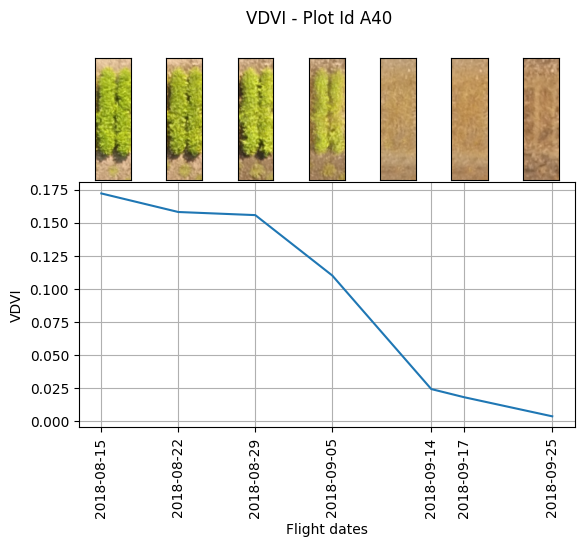

In [28]:
soybean_maturity_trials.plot.RGB_image_timeline(band_name='VDVI',
                                                n_id = 'A40',
                                                Red ='red',
                                                Green='green',
                                                Blue ='blue')

Setting days true changes the x axist from dates flown to days flown counting as 0 day the initial date.

(<Axes: >, <Axes: xlabel='Flight days', ylabel='ExR'>)

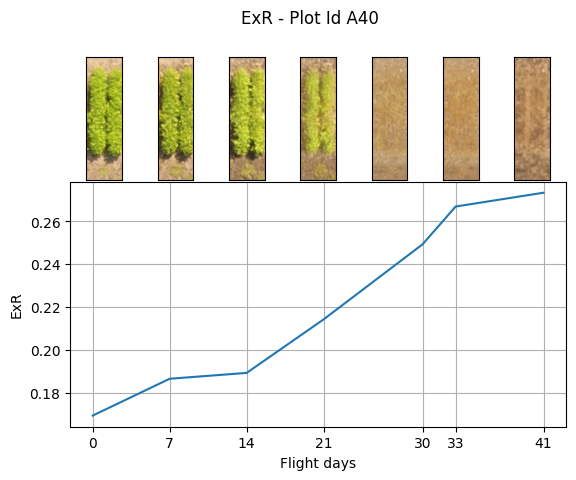

In [29]:
soybean_maturity_trials.plot.RGB_image_timeline(band_name='ExR',
                                                n_id = 'A40',
                                                Red ='red',
                                                Green='green',
                                                Blue ='blue',
                                                days = True)

## Days to senecence prediction

The method provided for predicting the senecence of a plot is very intuitive. It Work's by setting a threshold for a given feature. The algorithm returns the day of the event. Here three cases can happen. The threshold is inside the times series, is uppper or lower form it. For those outsiede the range. The prediction may not be the best. The assumptions of this method is that every plot has the same proportion of vegetation and soil.

In [30]:
preds = soybean_maturity_trials.get_threshold_estimation(band = 'VDVI',
                                                         threshold = 0.1)

Plot Id: A8 threshold is upper than range
Plot Id: A9 threshold is upper than range
Plot Id: A15 threshold is upper than range
Plot Id: A18 threshold is upper than range
Plot Id: A30 threshold is upper than range
Plot Id: A34 threshold is upper than range
Plot Id: A35 threshold is upper than range
Plot Id: A39 threshold is upper than range


In [33]:
preds.head()

,id,fid,date,red,green,blue,ID,geometry,VDVI,NGRDI,...,GRRI,VEG,MGRVI,GLI,ExR,ExB,ExG,num_day,dpred,in_range
0,A1,1,20180917,196.813842,147.758235,89.487787,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.015838,-0.142367,...,0.750751,0.976066,-0.566450,-0.032186,0.294386,-0.051779,9.214841,33,26.0,IN
1,A2,2,20180917,195.660992,144.670984,81.919041,2,"POLYGON ((315803.647 4900904.542, 315803.738 4...",0.020747,-0.149824,...,0.739396,0.988077,-0.627832,-0.042373,0.306108,-0.071011,11.761936,33,27.0,IN
2,A3,3,20180917,193.712169,142.281756,83.328056,3,"POLYGON ((315803.738 4900906.132, 315803.829 4...",0.013396,-0.153069,...,0.734501,0.972729,-0.635594,-0.027156,0.307437,-0.061105,7.523288,33,25.0,IN
3,A4,4,20180917,190.801443,144.724556,92.567450,4,"POLYGON ((315803.829 4900907.721, 315803.921 4...",0.010615,-0.137327,...,0.758509,0.965081,-0.523820,-0.021457,0.285913,-0.035343,6.080218,33,4.0,IN
4,A5,5,20180917,190.149981,142.098723,88.865285,5,"POLYGON ((315803.921 4900909.31, 315804.012 49...",0.009201,-0.144624,...,0.747298,0.962731,-0.568369,-0.018573,0.294721,-0.042001,5.182180,33,16.0,IN


### Data origin

The data used in this tutorial is open source and comes from:

Lorenz, A. J. (2020). Optimization of temporal UAS-based imagery anal-ysis to estimate plant maturity date for soybean breeding. CyVerseData Commons. https://doi.org/10.25739/bc4f-x382